# Visualize with Python : Earnings in Comparison to College Degrees

## Objective

Use pandas to quickly create visualizations to explore and understand data.

## Data Set

The data set contains data on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the data set and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

| Column         | Description                                                      |
|----------------|------------------------------------------------------------------|
| Rank           | Rank by median earnings (the dataset is ordered by this column). |
| Major_code     | Major code.                                                      |
| Major          | Major description.                                               |
| Major_category | Category of major.                                               |
| Total          | Total number of people with major.                               |
| Sample_size    | Sample size (unweighted) of full-time.                           |
| Men            | Male graduates.                                                  |
| Women          | Female graduates.                                                |
| ShareWomen     | Women as share of total.                                         |
| Employed       | Number employed.                                                 |
| Median         | Median salary of full-time, year-round workers.                  |
| Low_wage_jobs  | Number in low-wage service jobs.                                 |
| Full_time      | Number employed 35 hours or more.                                |
| Part_time      | Number employed less than 36 hours.                              |

<p>Using visualizations, Explore questions from the dataset like:<br/>
<p>•	Is there any link between the number of full-time employees and median salary?<br/> 
<p>    **-- Using scatter plots**<br/>
<p>•	What's the most common median salary range?<br/>
<p>    **-- Using histograms**<br/>
<p>•	Comparison of Unemployment Rate from 10 highest and lowest paying majors?<br/>
<p>    **-- Using bar plots**<br/>


## Reading the Data

In [1]:
import pandas as pd
import matplotlib as mlib

%matplotlib inline

recent_grads = pd.read_csv('C:/Users/i7/csv/recent-grads.csv')

Get the structures of the data:

In [2]:
recent_grads.iloc[0]
recent_grads.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050723,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068272,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087599,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Drop rows with missing values. Matplotlib expects that columns of values that pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [4]:
recent_grads = recent_grads.dropna(axis=0)
dimensions = recent_grads.shape
cleaned_data_count = dimensions[0]
print(cleaned_data_count)

172


## Some Scatter Plots of Various Relations

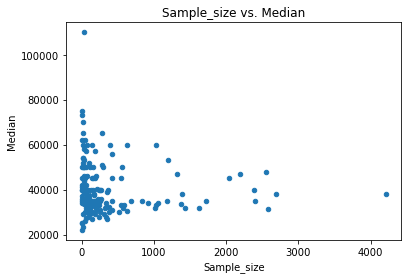

In [5]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

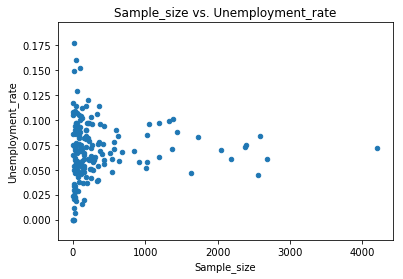

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

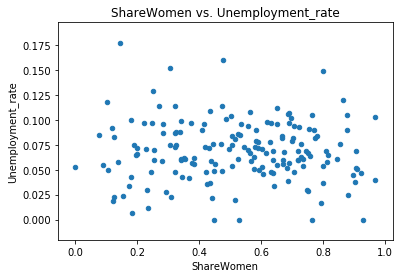

In [7]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

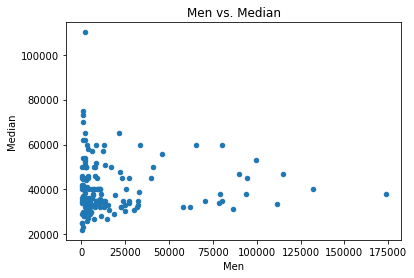

In [8]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

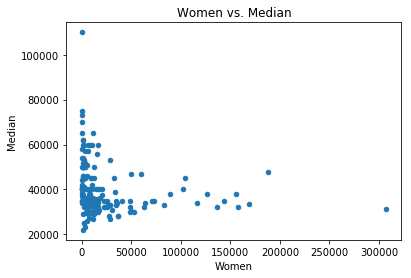

In [9]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

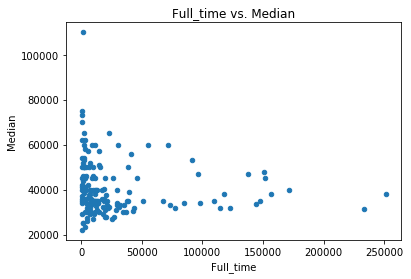

In [10]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

In [11]:
correlations = recent_grads.corr()
correlations = correlations["Median"]
print(correlations)

Rank                   -0.873500
Major_code             -0.176077
Total                  -0.110020
Sample_size            -0.067687
Men                     0.022397
Women                  -0.185427
ShareWomen             -0.615035
Employed               -0.107714
Full_time              -0.082393
Part_time              -0.190373
Full_time_year_round   -0.073102
Unemployed             -0.126559
Unemployment_rate      -0.110655
Median                  1.000000
P25th                   0.895212
P75th                   0.903435
College_jobs           -0.050370
Non_college_jobs       -0.174565
Low_wage_jobs          -0.209664
Name: Median, dtype: float64


### Observations :

It appears that there is not any link between the number of full-time employees and median salary

## Some Histograms Plots for Various Columns

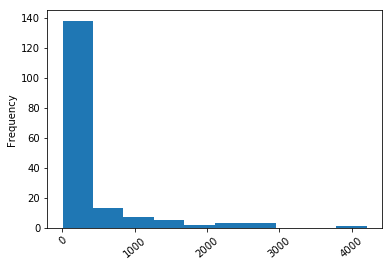

In [12]:
recent_grads["Sample_size"].plot(kind='hist', rot=40)

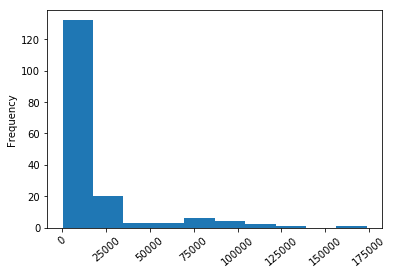

In [13]:
recent_grads["Men"].plot(kind='hist', rot=40)

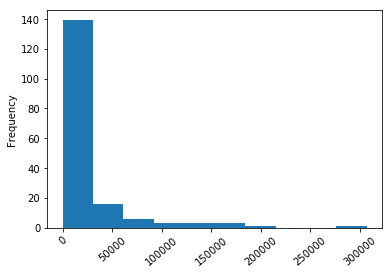

In [14]:
recent_grads["Women"].plot(kind='hist', rot=40)

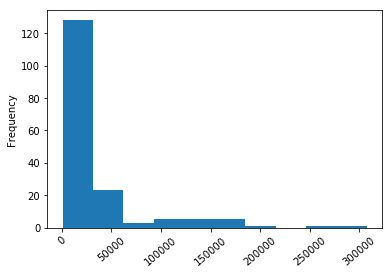

In [15]:
recent_grads["Employed"].plot(kind='hist', rot=40)

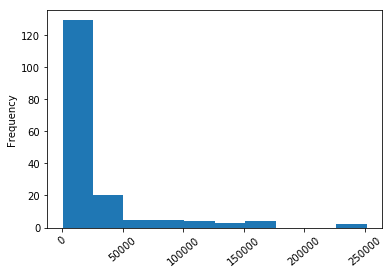

In [16]:
recent_grads["Full_time"].plot(kind='hist', rot=40)

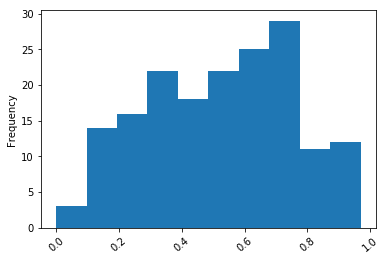

In [17]:
recent_grads["ShareWomen"].plot(kind='hist', rot=40)

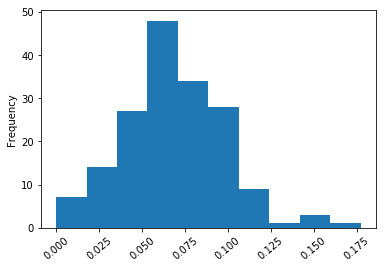

In [18]:
recent_grads["Unemployment_rate"].plot(kind='hist', rot=40)

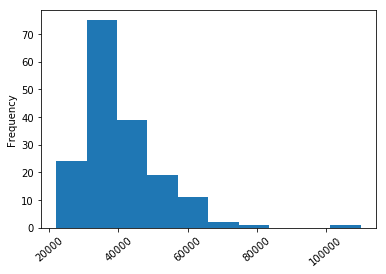

In [19]:
recent_grads["Median"].plot(kind='hist', rot=40)

### Observations :

It appears that the most common median salary range is between 25,000 to 40,000

## Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9BC908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB7D080>]], dtype=object)

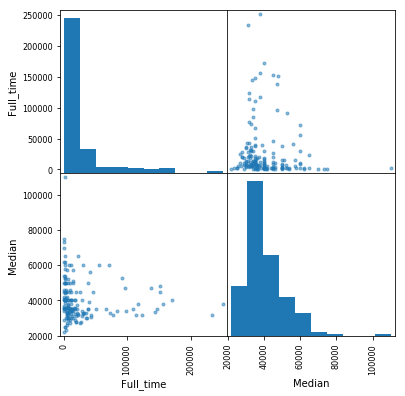

In [20]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[['Full_time','Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC86630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFCD748>]], dtype=object)

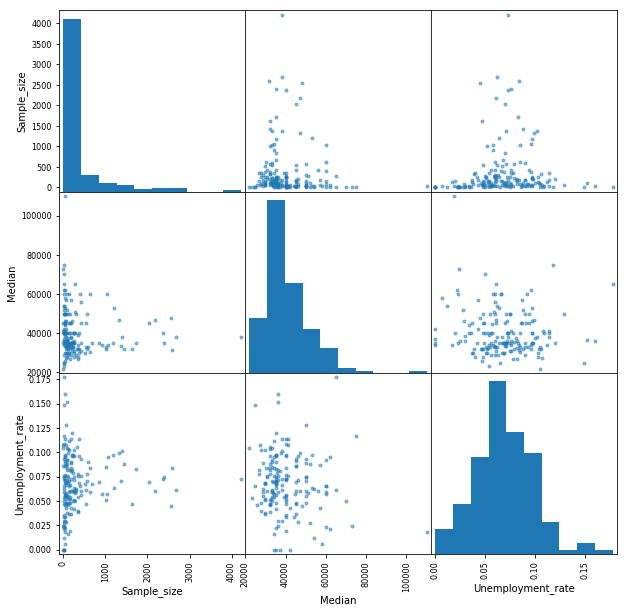

In [21]:
## Scatter Matrix of 3 variables
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Bar Plot

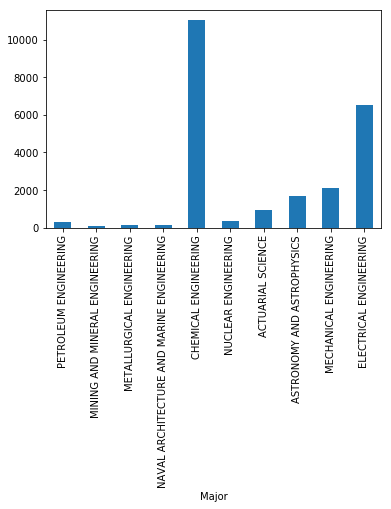

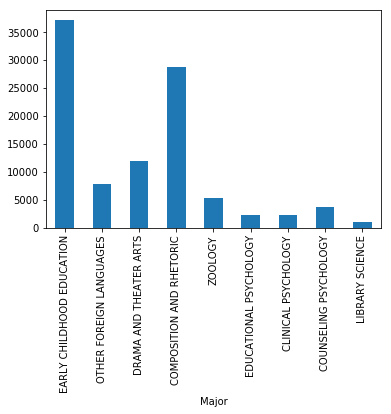

In [22]:
## Comparison of % of women from 10 highest and lowest paying Majors
recent_grads[:10].plot.bar(x='Major', y='Women', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Women', legend=False)

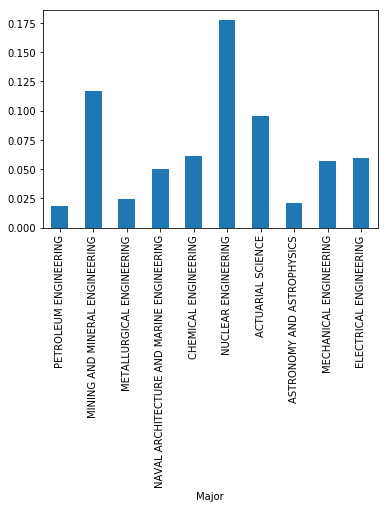

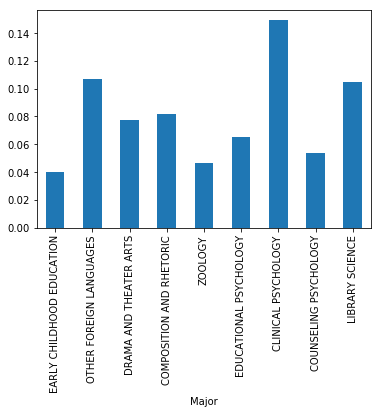

In [23]:
## Comparison of Unemployment Rate from 10 highest and lowest paying majors

recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)